In [40]:
import pandas as pd
import matplotlib.pyplot as plt

#baca file csv
df = pd.read_csv('/content/StudentsPerformance.csv')

df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [41]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


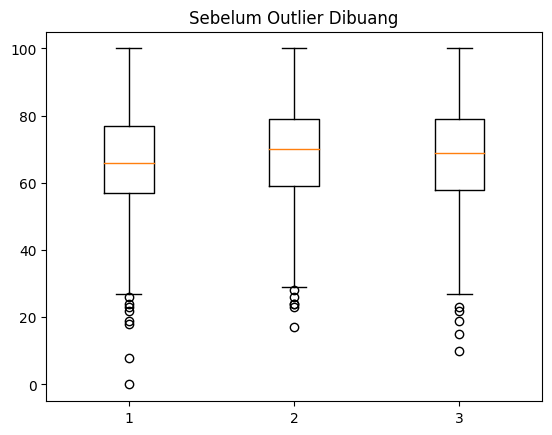

Jumlah Baris Sebelum Outlier dibuang: 1000
****************************************


In [42]:
kolom_numerik = ['math score','reading score','writing score']
plt.boxplot(df[kolom_numerik])
plt.title('Sebelum Outlier Dibuang')
plt.show()

# Data Sebelum dibuang outliernya
print(f'Jumlah Baris Sebelum Outlier dibuang: {df.shape[0]}')
print(20*'**')

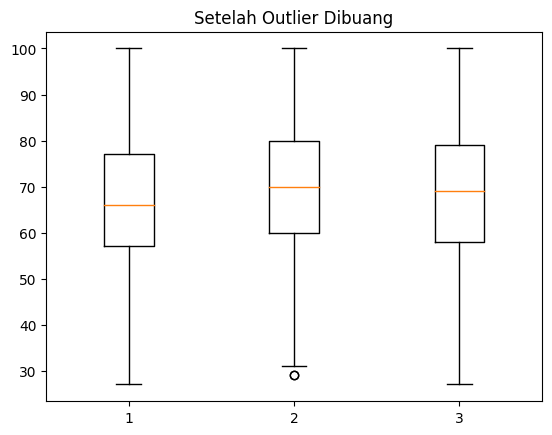

Jumlah Baris setelah outlier dibuang: 988


In [43]:
# Q1, Q3, dan IQR
Q1 = df[kolom_numerik].quantile(0.25)
Q3 = df[kolom_numerik].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[kolom_numerik] < (Q1 - 1.5 * IQR)) | (df[kolom_numerik] > (Q3 + 1.5 * IQR))).any(axis=1)]

#Cek outlier setelah dibuang
plt.boxplot(df[kolom_numerik])
plt.title('Setelah Outlier Dibuang')
plt.show()
print(f'Jumlah Baris setelah outlier dibuang: {df.shape[0]}')

In [44]:
# Membuat Kolom baru bernama 'final score'
df['final score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
print('Data Setelah ditambah kolom baru',df.head())

#Save data yang sudah bersih
df.to_csv('peforma_cleaned.csv', index=False)

Data Setelah ditambah kolom baru    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   final score  
0    72.666667  
1    82.333333  
2    92.666667  
3    49.333333  
4    76.333333  


In [45]:
# Import dan lihat sample data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('./peforma_cleaned.csv')
print(df.head())
print(20*'**')

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   final score  
0    72.666667  
1    82.333333  
2    92.666667  
3    49.333333  
4    76.333333  
****************************************


<Figure size 640x480 with 0 Axes>

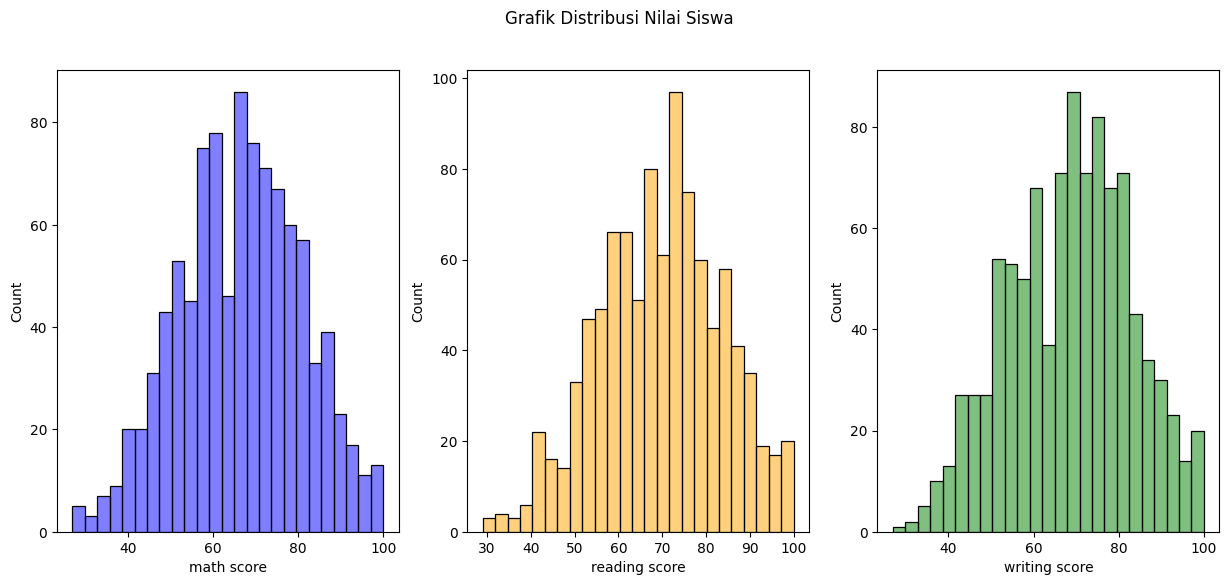

In [46]:
#Histogram Nilai
plt.figure(4)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
fig.suptitle('Grafik Distribusi Nilai Siswa')
sns.histplot(df['math score'], color='blue', ax=ax[0], alpha=0.5, bins=25)
sns.histplot(df['reading score'], color='orange', ax=ax[1], alpha=0.5, bins=25)
sns.histplot(df['writing score'], color='green', ax=ax[2], alpha=0.5, bins=25)
plt.show()

In [47]:
from sklearn.cluster import KMeans

#Standarisasi
from sklearn.preprocessing import StandardScaler
kolom_numerik = ['reading score','writing score','math score']
for kolom in kolom_numerik:
    df[kolom]= StandardScaler().fit_transform(df[[kolom]])

# Label Encoding
from sklearn.preprocessing import LabelEncoder
kolom_kategorikal = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']
for kolom in kolom_kategorikal:
    LE = LabelEncoder()
    df[kolom] = LE.fit_transform(df[kolom])
    print(LE.classes_)
    print(np.sort(df[kolom].unique()))
    print(20*'--')

['female' 'male']
[0 1]
----------------------------------------
['group A' 'group B' 'group C' 'group D' 'group E']
[0 1 2 3 4]
----------------------------------------
["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
[0 1 2 3 4 5]
----------------------------------------
['free/reduced' 'standard']
[0 1]
----------------------------------------
['completed' 'none']
[0 1]
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

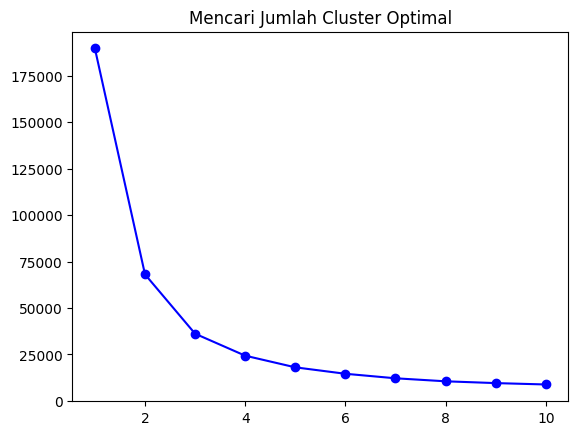

In [48]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bo-')
plt.title('Mencari Jumlah Cluster Optimal')
plt.show()

In [49]:
#Kolom Features
X = df[["gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score","final score"]]

#Training Model
cluster_model = KMeans(n_clusters = 3, random_state = 24)
labels = cluster_model.fit_predict(X)

# Membuat Kolom baru bernama 'cluster',
df_final = df
df_final['cluster'] = labels
print(df_final['cluster'].head())

0    2
1    0
2    0
3    1
4    2
Name: cluster, dtype: int32


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [50]:
# Membuat Kolom keterangan cluster
cluster_description = ({0 : 'Baik',
                        1 : 'Kurang',
                        2 : 'Cukup'})

df_final['cluster description'] = df_final['cluster'].map(cluster_description)
print(df_final[['cluster','cluster description']].head())

   cluster cluster description
0        2               Cukup
1        0                Baik
2        0                Baik
3        1              Kurang
4        2               Cukup


In [51]:
fig = px.scatter_3d(df_final, x = 'math score',
                    y = 'reading score',
                    z = 'writing score',
                    color = 'cluster description')
fig.show()